In [ ]:
'abaabab'.count('a')

In [2]:
def rule_1(s):
    num_a = s.count('a')
    s = 'b'*num_a + s + 'b'*num_a;
    return s

def rule(s, goal):
    print(s)
    if s not in goal :
        return False
    if len(s)>len(goal) :
        return False
    if s == goal:
        return True
    
    one = rule(rule_1(s), goal);
    two = rule('a'+ s, goal);
    three = rule(s+'a', goal);
    
    return one or two or three

rule('a', 'bbbabababbbaa')

a
bab
bbabb
abab
bbababbb
aabab
ababa
bbbabababbb
bbbbbbabababbbbbb
abbbabababbb
bbbabababbba
bbbbbbbabababbbabbbb
abbbabababbba
bbbabababbbaa
aababa
ababaa
baba
bbbababb
ababa
bbbabababbb
bbbbbbabababbbbbb
abbbabababbb
bbbabababbba
bbbbbbbabababbbabbbb
abbbabababbba
bbbabababbbaa
aababa
ababaa
babaa
aa
bbaabb
aaa
aaa
aa
bbaabb
aaa
aaa


True

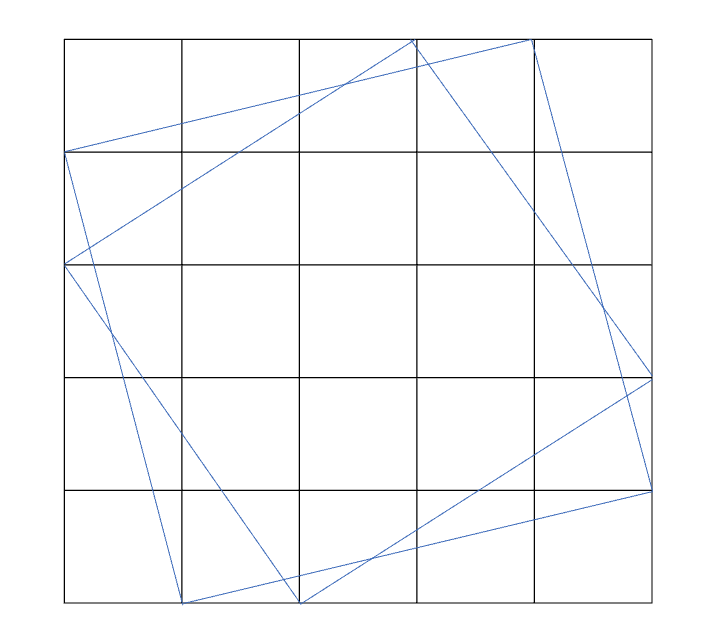

Employees 테이블은 자동차 판매회사의 직원 정보를 담은 테이블로 컬럼으로는 ID, NAME, SALARY, BRANCH_ID를 가집니다.
Sellings 테이블은 자동차 판매 회사의 판매기록을 담고 있는 데이블로 컬럼으로는 CAR_ID, EMPLOYEE_ID, CREATED_AT, PRICE를 가집니다.

문제  

판매 성적을 기준으로 사원을 평가하기 위해 자동차를 많이 판매한 순으로 판매수, 사원의 이름을 조회하는 SQL 문을 작성해주세요.
만약 판매수가 같은 사원이 여럿이고, 이 판매 수가 최대 판매 수인 경우는 사원들의 이름을 한 줄씩 보여줍니다. 만약 판매 수가 같은 사원이 여럿이고(N명), 이 판매 수가 최대 판매 수가 아닌 경우에는 "아이디가 최소인 사원의 이름 and N-1 other"을 보여줍니다.

In [48]:
def weird_rec(n):
    num = 0
    x = 1
    while (x < n/2) :
        num += 1
        x += 1
    return num * 2

def func(n):
    answer = 0
    for i in range(1, n):
        num = i**2
        print('길이가', n-i)
        answer += num
        print('add', num)
        if (n-i)%2 == 0:
            answer += num
            print('add 대각선', i**2)
        if (n-i) >= 3:
            answer += num * weird_rec(n-i)
        print("########", answer)
    print(answer)

In [49]:
16 + 9 + 9 + 4 + 2 * 4 + 1 + 2 * 1

49

In [50]:
func(5)

길이가 4
add 1
add 대각선 1
######## 4
길이가 3
add 4
######## 16
길이가 2
add 9
add 대각선 9
######## 34
길이가 1
add 16
######## 50
50


In [39]:
func(3)

길이가 2
add 1
add 대각선 1

길이가 1
add 4

6


In [40]:
func(5)

길이가 4
add 1
add 대각선 1
이상한 대각선 2개 2

길이가 3
add 4
이상한 대각선 2개 8

길이가 2
add 9
add 대각선 9

길이가 1
add 16

50


In [41]:
16+18+12+7

53

In [ ]:
func(5)

In [ ]:
WITH EmployeeSales AS (
  SELECT
    e.Name,
    s.SalesCount,
    RANK() OVER (ORDER BY s.SalesCount DESC) AS SalesRank,
    ROW_NUMBER() OVER (ORDER BY e.EmployeeId) AS EmployeeRank
  FROM
    Employee e
    JOIN Selling s ON e.EmployeeId = s.EmployeeId
)

SELECT
  CASE
    WHEN (SELECT COUNT(*) FROM EmployeeSales WHERE SalesRank = 1) > 1 THEN 'n-' || (SELECT COUNT(*) FROM EmployeeSales WHERE SalesRank = 1) - 1
    ELSE (SELECT Name FROM EmployeeSales WHERE SalesRank = 1)
  END AS EmployeeName,
  SalesCount
FROM
  EmployeeSales
WHERE
  SalesRank = 1;


In [5]:
nation = {}

nation[1] = [2]
nation[2] = [3]

for key, value in nation.items() :
    print(key, value)

1 [2]
2 [3]


In [2]:
nation

{1: [2]}

In [3]:
a,b = [1,2]
print(a,b)

1 2


In [6]:
a = set([1,2,3,3])
    

In [8]:
len(a)

3

In [10]:
from itertools import combinations
r = 3
no_nation = [i for i in range(r)]
a = combinations(no_nation, 2)

In [12]:
list(a)

[(0, 1), (0, 2), (1, 2)]

In [13]:
s = "centerminus"

In [19]:

for i in range(len(s)):
    for j in range(i+2, len(s)+1):
        print(s[i:j])
    
    

ce
cen
cent
cente
center
centerm
centermi
centermin
centerminu
centerminus
en
ent
ente
enter
enterm
entermi
entermin
enterminu
enterminus
nt
nte
nter
nterm
ntermi
ntermin
nterminu
nterminus
te
ter
term
termi
termin
terminu
terminus
er
erm
ermi
ermin
erminu
erminus
rm
rmi
rmin
rminu
rminus
mi
min
minu
minus
in
inu
inus
nu
nus
us


In [20]:
reduce(lambda a, b: a+b, [1,2,3,4,5], 0)

NameError: name 'reduce' is not defined

In [21]:
[1,2,3,4,5].pop()

5

In [76]:
from functools import reduce

def canAdd(a,b):
    if a in b or b in a:
        return False
    result = addString(a,b)
    if result == "" : return False
    return True

def addString(a,b):
    print("add", a, b)
    prefix= ''
    for i in range(len(a)):
        if a[i:] == b[:len(a)-1]:
            prefix = a[i:]
            break
    if prefix=='':
        if a[-1] == b[0] :
            return a[:-1]+b
        return ''
    
    result =a+b[len(prefix):]
    return result

def solution(s, word_dict) :
    answer = []
    
    def dfs(words, idx) :
        print(words, idx)
        if idx >= len(word_dict) :
            return False
        
        new_idx = idx + 1
        if canAdd(words[-1], word_dict[idx]) :
            words.append(word_dict[idx])
            print(words)
            if reduce(addString, words[1:], words[0]) == s :
                return len(words)
            else :
                a = dfs(words, new_idx)
                if not a :
                    answer.append(a)
        else:
            b = dfs(words, new_idx)
            words.pop()
            
            words.append(word_dict[idx])
            c = dfs(words, new_idx)

            for t in [b, c] :
                if not t :
                    answer.append(t)
                                        
    dfs([word_dict[0]], 1)
    return max(answer)

In [75]:
a = 'cadsfadsfadsf'
a[-1]

'f'